# 🚢 Titanic Survival Prediction using Gaussian Naive Bayes


In [21]:
import pandas as pd
df=pd.read_csv("Titanic.csv")                                                        
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
df.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [25]:
# Separate features (inputs) and target (Survived) column
target=df.Survived
inputs=df.drop('Survived',axis='columns')

In [27]:
# Convert 'Sex' column into numeric dummy variables (one-hot encoding)
dummies = pd.get_dummies(inputs.Sex).astype(int)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [29]:
inputs=pd.concat([inputs,dummies],axis='columns')                 # Add dummy variables to the inputs dataframe
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [31]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [33]:
inputs.isna().any()

Pclass    False
Age        True
Fare      False
female    False
male      False
dtype: bool

In [35]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [37]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())                        # Fill missing values in 'Age' column with the column's mean
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [39]:
inputs.isna().any()

Pclass    False
Age       False
Fare      False
female    False
male      False
dtype: bool

In [41]:
# Split data into training and testing sets (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(inputs, target, test_size=0.3,random_state=42)

In [43]:
len(X_train)

623

In [45]:
len(X_test)

268

### # Using GaussianNB because our dataset has continuous numerical features (like Age and Fare)


In [48]:
# Import Gaussian Naive Bayes and create the model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [50]:
model.fit(X_train, y_train)                        # Train the Gaussian Naive Bayes model using the training data

,priors,None
,var_smoothing,1e-09


In [52]:
model.score(X_test, y_test)                        # Evaluate the model's accuracy on the test data

0.7873134328358209

In [51]:
X_test[:10]

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,0,1
439,2,31.000000,10.5000,0,1
840,3,20.000000,7.9250,0,1
720,2,6.000000,33.0000,1,0
39,3,14.000000,11.2417,1,0
290,1,26.000000,78.8500,1,0
300,3,29.699118,7.7500,1,0
333,3,16.000000,18.0000,0,1
208,3,16.000000,7.7500,1,0
136,1,19.000000,26.2833,1,0


In [53]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [54]:
# Import libraries for visualization and to create a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [55]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0])

In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[129,  28],
       [ 29,  82]])

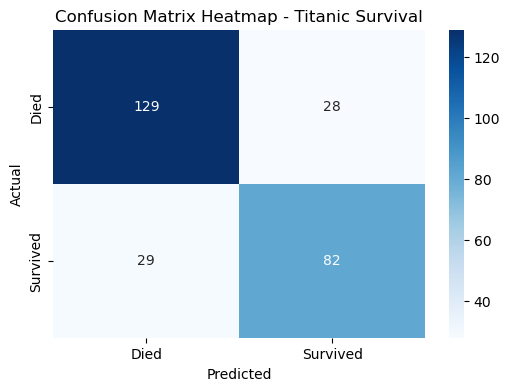

In [62]:
# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Titanic Survival")
plt.show()
